In [1]:
# Importing the required modules and packages

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("songs_normalize.csv")
m = (df["year"] >= 2000) & (df["year"] <= 2019)  # mask that exludes all the songs not released in the 2000-2019 period
df = df[m]                                       # applying the mask

In [9]:
# Preparing the datasets for question 3

df_copy = df.copy()                 # copying the original DataFrame (songs_nomalize.csv)
df_copy.reset_index(inplace=True)   # adding a column named "index" to df_copy as a DataFrame column


# ========================================
## Part 1: creating a new DataFrame that stores the id of a song and each genre it is classified in in a distinct row

df_genres = pd.DataFrame(columns=["id_track", "genre"])  # the new DataFrame has only 2 columns: "id_track" and "genre"

### Creating a function that finds id and genres of the given row (the row must be a spotify track)
def get_genres(row):
    i = row['index']                      # index of the song
    genres = row['genre'].split(', ')     # list of genres (taken from the "genre" column of df)
    for g in genres:
        df_genres.loc[len(df_genres)] = [i, g.strip()]  # a new row of df_genres is assgined with an [index_of_the_song, genre_of_the_song] object

### Applying the function to every row in df
df_copy.apply( get_genres , axis=1 )    # axis=1 means the function "get_genres" is applied on the rows of df_copy

# ========================================
## Part 2: creating a new DataFrame that shows the number of tracks per genre

tpg = df_genres.groupby("genre", as_index=False).size()  # Tracks Per Genre
tpg = tpg.rename(columns={"size" : "n_tracks"})          # renaming the column "size" in "n_tracks" (more significant)
tpg = tpg.sort_values(by="n_tracks", ascending=False)    # sort the rows in descending order

#========================================
## Part 3: creation of a df containing only the songs of the top-4 genres

columns = ["year", "explicit", "duration_ms", "danceability", "energy", "valence", "tempo", "genre_y"]  # columns to select for each DataFrame

# Series containing the top-4 most popular genres
most_popular_genres = tpg.head(4)["genre"]
m_genre = df_genres["genre"].isin(most_popular_genres)

mvpg = pd.merge(df_copy, df_genres[m_genre], left_on="index", right_on="id_track")[columns]

In [7]:
m_pop = mvpg["genre_y"]=="pop"
m_hh = mvpg["genre_y"]=="hip hop"
m_rb = mvpg["genre_y"]=="R&B"
m_de = mvpg["genre_y"]=="Dance/Electronic"

<Figure size 2000x800 with 0 Axes>

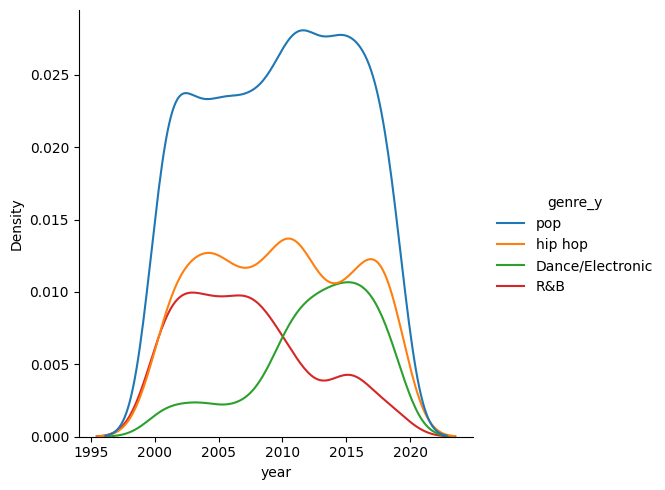

In [33]:
plt.figure(figsize=(20, 8))
ax = sns.displot(data=mvpg, x="year", kind="kde", hue="genre_y")

<Axes: xlabel='year', ylabel='Count'>

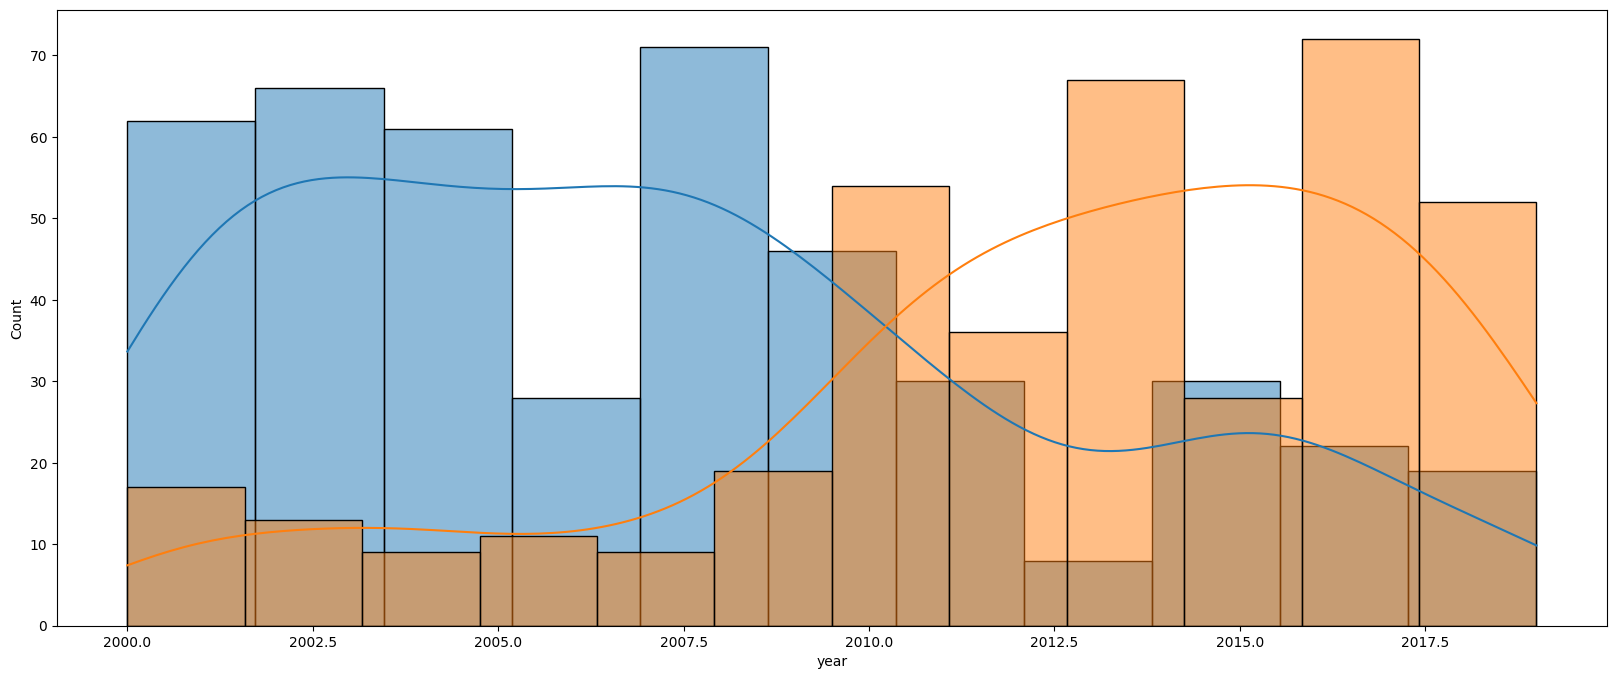

In [29]:
plt.figure(figsize=(20,8))
sns.histplot(data=mvpg[m_rb], x="year", kde=True)
sns.histplot(data=mvpg[m_de], x="year", kde=True)